In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func1(x,y):
    return -(2*x*y + 2*x - x**2 - 2*y**2)
def dx1(x,y):
    return -(2*y + 2 - 2*x)
def dxx1(x,y):
    return -(-2)
def dxy1(x,y):
    return -(2)
def dy1(x,y):
    return -(2*x - 4*y)
def dyx1(x,y):
    return -(2)
def dyy1(x,y):
    return -(-4)
def func2(x,y):
    return 100*(x**2 - y)**2 + (1-x)**2
def dx2(x,y):
    return 400*x**3 - 400*y*x -2 + 2*x
def dxx2(x,y):
    return 1200*x**2 - 400*y + 2
def dxy2(x,y):
    return 400*x
def dy2(x,y):
    return 200*x**2 + 200*y
def dyx2(x,y):
    return 400*x
def dyy2(x,y):
    return 200
def func3(x,y):
    return 20 + x**2 - 10*math.cos(2*math.pi*x) + y**2 - 10*math.cos(2*math.pi*y)
def dx3(x,y):
    return 2*x + 20*math.pi*math.sin(2*math.pi*x)
def dxx3(x,y):
    return 2 + 40*math.pi*math.pi*math.cos(2*math.pi*x)
def dxy3(x,y):
    return 0
def dy3(x,y):
    return 2*y + 20*math.pi*math.sin(2*math.pi*y)
def dyx3(x,y):
    return 0
def dyy3(x,y):
    return 2 + 40*math.pi*math.pi*math.cos(2*math.pi*x)

In [3]:
def hillClimber(func, start, iterations, radius):
    xBest = start
    history = [[xBest, func(xBest[0], xBest[1])]]
    for i in range(iterations):
        x = [xBest[0] + random.uniform(-radius, radius), xBest[1] + random.uniform(-radius, radius)]
        if func(x[0],x[1]) < func(xBest[0], xBest[1]):
            xBest = x
            history.append([xBest, func(xBest[0], xBest[1])])
    return history

def gradient_descent(func, dx, dy, start, iterations):
    solution = start.copy()
    history = [[start, func(start[0],start[1])]]
    best = solution.copy()
    step = 2
    tolerance = .1
    c1 = .0001
    c2 = .9
    for i in range(iterations):
        grad_x = dx(solution[0], solution[1])
        grad_y = dy(solution[0], solution[1])
        p = [[-grad_x],[-grad_y]]
        c = 0
        
        while(True):
            if(c==2000):
                break
            if(func(solution[0] + step*p[0][0],solution[1] + step*p[1][0]) > func(solution[0],solution[1]) + c1*step*np.matmul([grad_x,grad_y],p)):
                step = .9*step
            elif(np.matmul([dx(solution[0] + step*p[0][0], solution[1] + step*p[1][0]),dy(solution[0] + step*p[0][0], solution[1] + step*p[1][0])],p) <= c2*np.matmul([grad_x,grad_y],p)):
                step = 1.1*step
            else:
                break
            c += 1

        #solution[0] = solution[0] - math.copysign(step,grad_x)
        #solution[1] = solution[1] - math.copysign(step,grad_y)
        solution[0] = solution[0] - step*grad_x
        solution[1] = solution[1] - step*grad_y
        #print(solution[0], solution[1], func(solution[0], solution[1]))
        
        if (func(solution[0], solution[1]) < func(best[0], best[1])):
            best = solution.copy()
            history.append([best, func(best[0], best[1])])
    
    return history

def newtown(func, dx, dy, dxx, dxy, dyx, dyy, start, iterations):
    solution = start.copy()
    history = [[start, func(start[0],start[1])]]
    best = solution.copy()
    step = .5
    tolerance = .1
    c1 = .0001
    c2 = .9
    for i in range(iterations):
        grad_x = dx(solution[0], solution[1])
        grad_y = dy(solution[0], solution[1])
        d_xx = dxx(solution[0], solution[1])
        d_xy = dxy(solution[0], solution[1])
        d_yx = dyx(solution[0], solution[1])
        d_yy = dyy(solution[0], solution[1])
        if(abs(grad_x) < tolerance and abs(grad_y) < tolerance):
            break
            
        c = 0
        p = - np.matmul(np.linalg.inv([[d_xx, d_xy],[d_yx, d_yy]]),[[grad_x],[grad_y]])

        while(True):
            if(c==1000):
                break
            if(func(solution[0] + step*p[0][0],solution[1] + step*p[1][0]) > func(solution[0],solution[1]) + c1*step*np.matmul([grad_x,grad_y],p)):
                step = .9*step
            elif(np.matmul([dx(solution[0] + step*p[0][0], solution[1] + step*p[1][0]),dy(solution[0] + step*p[0][0], solution[1] + step*p[1][0])],p) <= c2*np.matmul([grad_x,grad_y],p)):
                step = 1.1*step
            else:
                break
            c += 1    


        #solution[0] = solution[0] - math.copysign(step,grad_x)
        #solution[1] = solution[1] - math.copysign(step,grad_y)
        solution[0] = solution[0] - step*grad_x
        solution[1] = solution[1] - step*grad_y
        #print(solution[0], solution[1], func(solution[0], solution[1]))
        
        if (func(solution[0], solution[1]) < func(best[0], best[1])):
            best = solution.copy()
            history.append([best, func(best[0], best[1])])
    
    return history


In [4]:
hc1 = hillClimber(func1, [2, -2], 2000, 1)
hc2 = hillClimber(func2, [-1.5, 1.5], 2000, 1)
hc3 = hillClimber(func3, [-2, 2], 20000, 1)

gd1 = gradient_descent(func1, dx1, dy1, [2, -2], 20)
gd2 = gradient_descent(func2, dx2, dy2, [-1.5, 1.5], 20)
gd3 = gradient_descent(func3, dx3, dy3, [-2, 2], 20)

ne1 = newtown(func1, dx1, dy1, dxx1, dxy1, dyx1, dyy1,[2, -2], 20)
ne2 = newtown(func2, dx2, dy2, dxx2, dxy2, dyx2, dyy2,[-1.5, 1.5], 20)
ne3 = newtown(func3, dx3, dy3, dxx3, dxy3, dyx3, dyy3,[-2, 2], 20)



print("First function results:") 
print("\tHill Climbing at x: ", hc1[-1][0][0], "\n\tHill Climbing at y: ", hc1[-1][0][1], "\n\teval: ", hc1[-1][1])
print("\tGradient Descent at x: ", gd1[-1][0][0], "\n\tGradient Descent at y: ", gd1[-1][0][1], "\n\teval: ", gd1[-1][1])
print("\tNewton at x: ", ne1[-1][0][0], "\n\tNewton at y: ", ne1[-1][0][1], "\n\teval: ", ne1[-1][1])

print("Second function results:") 
print("\tHill Climbing at x: ", hc2[-1][0][0], "\n\tHill Climbing at y: ", hc2[-1][0][1], "\n\teval: ", hc2[-1][1])
print("\tGradient Descent at x: ", gd2[-1][0][0], "\n\tGradient Descent at y: ", gd2[-1][0][1], "\n\teval: ", gd2[-1][1])
print("\tNewton at x: ", ne2[-1][0][0], "\n\tNewton at y: ", ne2[-1][0][1], "\n\teval: ", ne2[-1][1])

print("Third function results:") 
print("\tHill Climbing at x: ", hc3[-1][0][0], "\n\tHill Climbing at y: ", hc3[-1][0][1], "\n\teval: ", hc3[-1][1])
print("\tGradient Descent at x: ", gd3[-1][0][0], "\n\tGradient Descent at y: ", gd3[-1][0][1], "\n\teval: ", gd3[-1][1])
print("\tNewton at x: ", ne3[-1][0][0], "\n\tNewton at y: ", ne3[-1][0][1], "\n\teval: ", ne3[-1][1])




First function results:
	Hill Climbing at x:  2.023017497383367 
	Hill Climbing at y:  1.0284706815314548 
	eval:  -1.9991596830757814
	Gradient Descent at x:  2.3917220661936733 
	Gradient Descent at y:  0.3623247517282331 
	eval:  -0.5337114467128798
	Newton at x:  2 
	Newton at y:  -2 
	eval:  16
Second function results:
	Hill Climbing at x:  1.074390741483476 
	Hill Climbing at y:  1.1493481865830597 
	eval:  0.008001368288492256
	Gradient Descent at x:  0.10190992956839441 
	Gradient Descent at y:  -6.232529181043542e-05 
	eval:  0.8174817594105707
	Newton at x:  -1.4999999999999531 
	Newton at y:  1.4999999999999227 
	eval:  62.49999999999031
Third function results:
	Hill Climbing at x:  -0.003367353430865583 
	Hill Climbing at y:  0.006082018292575819 
	eval:  0.009587320680580547
	Gradient Descent at x:  -0.017524724488879685 
	Gradient Descent at y:  0.017524724488879685 
	eval:  0.12173630401800395
	Newton at x:  -1.532107773982716e-14 
	Newton at y:  1.532107773982716e-14 
	

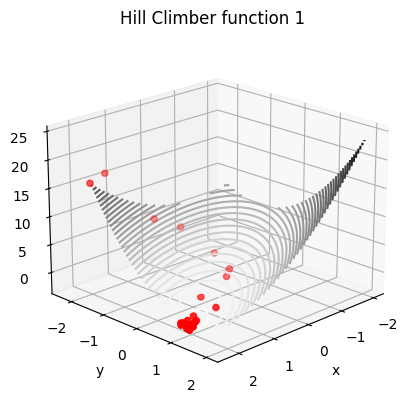

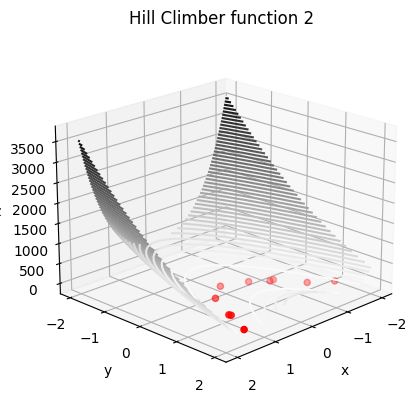

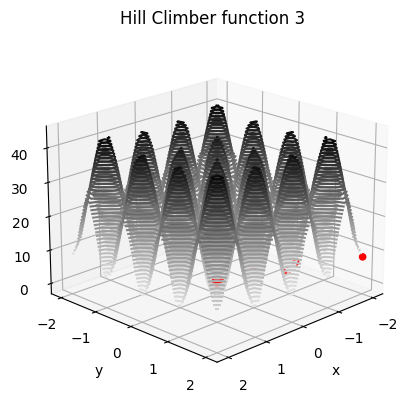

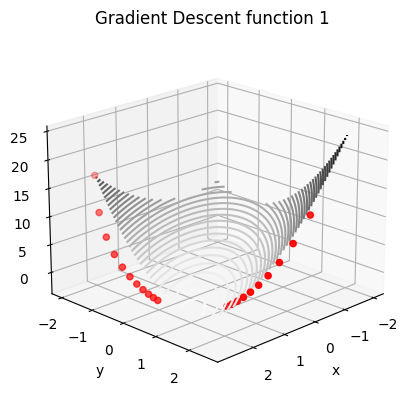

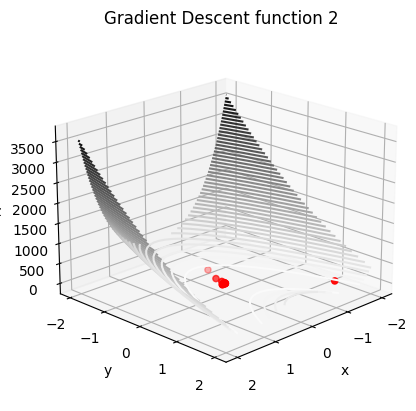

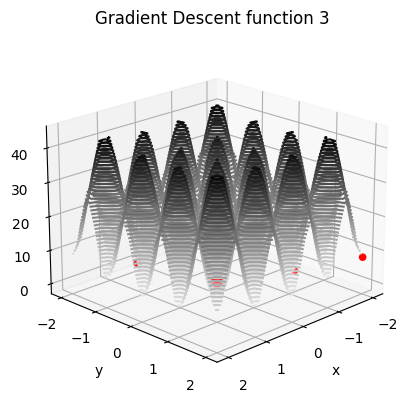

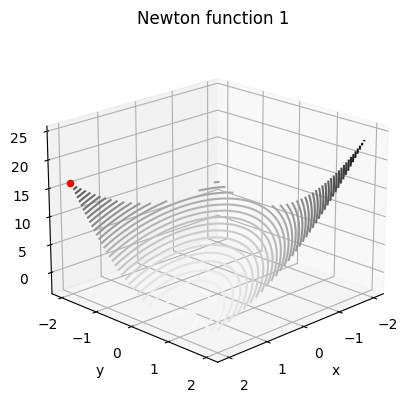

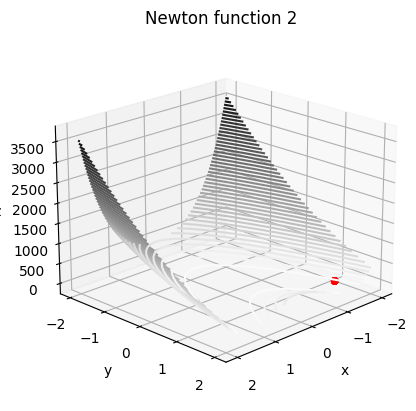

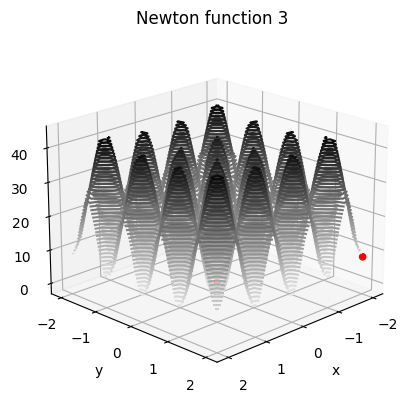

In [5]:
def myPlot(func, history, title):
    x = np.linspace(-2, 2, 30)
    y = np.linspace(-2, 2, 30)
    X, Y = np.meshgrid(x, y)
    Z = []
    for i,val in enumerate(X):
        Z.append([])
        for j,val2 in enumerate(val):
            Z[i].append(func(X[i][j],Y[i][j]))
    

    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    
    xLine = []
    yLine = []
    zLine = []
    
    for i, val in enumerate(history):
        xLine.append(val[0][0])
        yLine.append(val[0][1])
        zLine.append(val[1])
            
    ax.scatter(xLine, yLine, zLine, color="red")
        
    ax.contour3D(X, Y, Z, 50, cmap='binary')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    
    ax.view_init(20,45)
    
    ax.set_title(title)
    
    
myPlot(func1, hc1, "Hill Climber function 1")
myPlot(func2, hc2, "Hill Climber function 2")
myPlot(func3, hc3, "Hill Climber function 3")

myPlot(func1, gd1, "Gradient Descent function 1")
myPlot(func2, gd2, "Gradient Descent function 2")
myPlot(func3, gd3, "Gradient Descent function 3")

myPlot(func1, ne1, "Newton function 1")
myPlot(func2, ne2, "Newton function 2")
myPlot(func3, ne3, "Newton function 3")
